**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

**Load Dataset from Google Drive**

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/processed_IIoT.csv")
#del df[df.columns[0]]
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.700000e+01,1.093946e+09,...,0,0,0,0,1,0,0,1,0,Password
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,4.189800e+09,...,0,0,0,1,0,0,1,0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.069571e+09,1.069571e+09,...,0,0,0,0,1,0,0,1,0,DDoS_TCP
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,0,1,0,0,1,0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.900000e+01,1.200409e+09,...,0,0,0,1,0,0,1,0,0,Normal


In [ ]:
df.shape

(1921663, 96)

In [ ]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
count,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1921663.0,1.921663e+06,1.921663e+06,1921663.0,1.921663e+06,1.921663e+06,...,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06,1.921663e+06
mean,8.355961e-03,8.359039e-03,9.597278e+00,1.063151e+01,0.0,5.814512e+00,4.326339e+00,0.0,1.237652e+02,1.242883e+02,...,2.653951e-04,2.653951e-04,1.194278e-03,1.194278e-03,1.699829e+02,7.400079e+01,1.101629e+01,1.699833e+02,7.400079e+01,1.101589e+01
std,1.459344e+00,1.459882e+00,4.803800e+01,5.042413e+01,0.0,3.783635e+01,3.293174e+01,0.0,7.890822e+01,7.911675e+01,...,2.601456e-01,2.601456e-01,5.518511e-01,5.518511e-01,1.202142e+02,1.157328e+02,5.184396e+01,1.202141e+02,1.157328e+02,5.184306e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.636637e+01,6.471557e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.231607e+02,1.285834e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,0.000000e+00,0.000000e+00,2.550000e+02,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.916967e+02,1.918092e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,0.000000e+00,2.550000e+02,2.550000e+02,0.000000e+00
max,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,0.0,2.550000e+02,2.550000e+02,0.0,2.550000e+02,2.550000e+02,...,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02


**Generate images corresponding to each class**

In [ ]:
#Generate images corresponding to each class
df0=df[df['Attack_type']=='Normal'].drop(['Attack_type'],axis=1)
df1=df[df['Attack_type']=='DDoS_UDP'].drop(['Attack_type'],axis=1)
df2=df[df['Attack_type']=='DDoS_ICMP'].drop(['Attack_type'],axis=1)
df3=df[df['Attack_type']=='SQL_injection'].drop(['Attack_type'],axis=1)
df4=df[df['Attack_type']=='DDoS_TCP'].drop(['Attack_type'],axis=1)
df5=df[df['Attack_type']=='Vulnerability_scanner'].drop(['Attack_type'],axis=1)
df6=df[df['Attack_type']=='Password'].drop(['Attack_type'],axis=1)
df7=df[df['Attack_type']=='DDoS_HTTP'].drop(['Attack_type'],axis=1)
df8=df[df['Attack_type']=='Uploading'].drop(['Attack_type'],axis=1)
df9=df[df['Attack_type']=='Backdoor'].drop(['Attack_type'],axis=1)
df10=df[df['Attack_type']=='Port_Scanning'].drop(['Attack_type'],axis=1)
df11=df[df['Attack_type']=='XSS'].drop(['Attack_type'],axis=1)
df12=df[df['Attack_type']=='Ransomware'].drop(['Attack_type'],axis=1)
df13=df[df['Attack_type']=='Fingerprinting'].drop(['Attack_type'],axis=1)
df14=df[df['Attack_type']=='MITM'].drop(['Attack_type'],axis=1)

In [ ]:
# ***********Generate 95*95 color images for class 0 (Normal)************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Normal/"
os.makedirs(image_path)

for i in range(0, len(df0)):  
    count=count+1
    if count<=285: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ***********Generate 95*95 color images for class 1 (DDoS_UDP)************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_UDP/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=285: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ***********Generate 95*95 color images for class 2 (DDoS_ICMP)************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_ICMP/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=285: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ***********Generate 95*95 color images for class 3 (SQL_injection )************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/SQL_injection/"
os.makedirs(image_path)

for i in range(0, len(df3)):  
    count=count+1
    if count<=285: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ***********Generate 95*95 color images for class 4 (DDoS_TCP)************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_TCP/"
os.makedirs(image_path)

for i in range(0, len(df4)):  
    count=count+1
    if count<=285: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ***********Generate 95*95 color images for class 5 (Vulnerability_scanner)************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Vulnerability_scanner/"
os.makedirs(image_path)

for i in range(0, len(df5)):  
    count=count+1
    if count<=285: 
        im=df5.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ***********Generate 95*95 color images for class 6 (Password)************
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Password/"
os.makedirs(image_path)

for i in range(0, len(df6)):  
    count=count+1
    if count<=285: 
        im=df6.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# *Generate 95*95 color images for class 7 (DDoS_HTTP)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_HTTP/"
os.makedirs(image_path)

for i in range(0, len(df7)):  
    count=count+1
    if count<=285: 
        im=df7.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# *Generate 95*95 color images for class 8 (Uploading)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Uploading/"
os.makedirs(image_path)

for i in range(0, len(df8)):  
    count=count+1
    if count<=285: 
        im=df8.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ********Generate 95*95 color images for class 9 (Backdoor)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Backdoor/"
os.makedirs(image_path)

for i in range(0, len(df9)):  
    count=count+1
    if count<=285: 
        im=df9.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ********Generate 95*95 color images for class 10 (Port_Scanning)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Port_Scanning/"
os.makedirs(image_path)

for i in range(0, len(df10)):  
    count=count+1
    if count<=285: 
        im=df10.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []        
       

In [ ]:
# ********Generate 95*95 color images for class 11 (XSS)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/XSS/"
os.makedirs(image_path)

for i in range(0, len(df11)):  
    count=count+1
    if count<=285: 
        im=df11.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []   

In [ ]:
# ********Generate 95*95 color images for class 12 (Ransomware)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Ransomware/"
os.makedirs(image_path)

for i in range(0, len(df12)):  
    count=count+1
    if count<=285: 
        im=df12.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = [] 

In [ ]:
# ********Generate 95*95 color images for class 13 (Fingerprinting)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Fingerprinting/"
os.makedirs(image_path)

for i in range(0, len(df13)):  
    count=count+1
    if count<=285: 
        im=df13.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# ********Generate 95*95 color images for class 14 (MITM)***
count=0
ims = []

image_path = "/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/MITM/"
os.makedirs(image_path)

for i in range(0, len(df14)):  
    count=count+1
    if count<=285: 
        im=df14.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(95,95,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

**Display samples for each category**

In [ ]:
img1 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Normal/1002143.png')
img2 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_UDP/108965.png')
img3 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_ICMP/15157.png')
img4 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/SQL_injection/14299.png')
img5 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_TCP/13441.png')
img6 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Vulnerability_scanner/13727.png')
img7 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Password/12011.png')
img8 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/DDoS_HTTP/16015.png')
img9 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Uploading/15157.png')
img10 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Backdoor/17731.png')
img11 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Port_Scanning/12869.png')
img12 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/XSS/4003.png')
img13 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Ransomware/6863.png')
img14 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/Fingerprinting/8007.png')
img15 = Image.open('/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/MITM/2859.png')

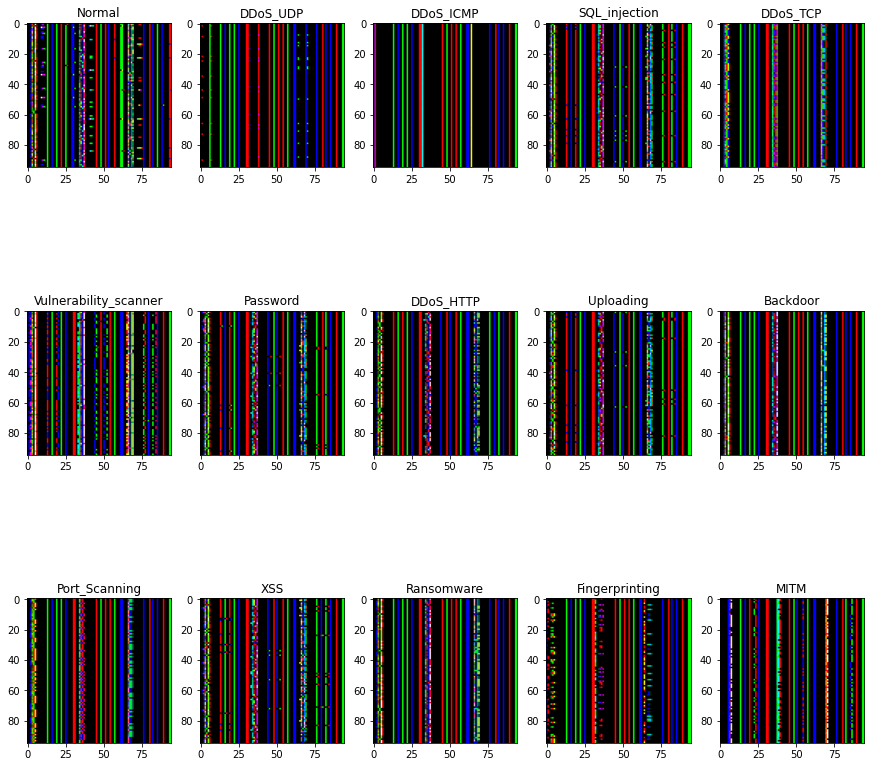

In [ ]:
plt.figure(figsize=(15, 15)) 
plt.subplot(3,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(3,5,2)
plt.imshow(img2)
plt.title("DDoS_UDP")
plt.subplot(3,5,3)
plt.imshow(img3)
plt.title("DDoS_ICMP")
plt.subplot(3,5,4)
plt.imshow(img4)
plt.title("SQL_injection")
plt.subplot(3,5,5)
plt.imshow(img5)
plt.title("DDoS_TCP")
plt.subplot(3,5,6)
plt.imshow(img6)
plt.title("Vulnerability_scanner")
plt.subplot(3,5,7)
plt.imshow(img7)
plt.title("Password")
plt.subplot(3,5,8)
plt.imshow(img8)
plt.title("DDoS_HTTP")
plt.subplot(3,5,9)
plt.imshow(img9)
plt.title("Uploading")
plt.subplot(3,5,10)
plt.imshow(img10)
plt.title("Backdoor")
plt.subplot(3,5,11)
plt.imshow(img11)
plt.title("Port_Scanning")
plt.subplot(3,5,12)
plt.imshow(img12)
plt.title("XSS")
plt.subplot(3,5,13)
plt.imshow(img13)
plt.title("Ransomware")
plt.subplot(3,5,14)
plt.imshow(img14)
plt.title("Fingerprinting")
plt.subplot(3,5,15)
plt.imshow(img15)
plt.title("MITM")

plt.show()  # display it

**Split the training and test set**

In [ ]:
# Create folders to store images
Train_Dir='/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/'
Val_Dir='/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          

Numbers

val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

6711
Finish creating test set


**Resize the images 224*224 for better CNN training**

In [ ]:
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for this_img in imgs:
            this_img_path=os.path.join(root,this_img)
            imgfilepaths.append(this_img_path)
    for this_img_path in imgfilepaths:
        dir_name,filename=os.path.split(this_img_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(this_img_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

DATA_DIR_224='/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train_A/'
get_224(folder='/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/',dstdir=DATA_DIR_224)

DATA_DIR2_224='/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A/'
get_224(folder='/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test/',dstdir=DATA_DIR2_224)

Finish resizing
Finish resizing
